In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
#load datasets
X_train = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/X_train.npy')
y_train = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/y_train.npy')
X_val = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/X_val.npy')
y_val = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/y_val.npy')
X_test = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/X_test.npy')
y_test = np.load('/content/drive/MyDrive/UrbanSoundsDatasets/y_test.npy')

In [8]:
X_train.shape

(6985, 128, 128, 3)

In [9]:
X_test[789]

array([[[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ],
        ...,
        [0.01176471, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ],
        [0.01176471, 0.        , 0.        ]],

       [[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ]],

       [[1.        , 1.        , 1.        ],
        [0.00392157, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ],
        [0.01568627, 0.        , 0.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.14509804, 0.08627451, 0.2745098 ],
        [0.43529412, 0

In [10]:
# Create a model object
model = tf.keras.Sequential()

In [11]:
# Add convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(128, 
                                 kernel_size=(3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation="relu",
                                 input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128, 
                                 kernel_size=(3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D())

In [12]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [13]:
# Add the dense layers and dropout layers
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [14]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [15]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
# Train the model for 100 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
55/55 [==============================] - 25s 229ms/step - loss: 2.2851 - accuracy: 0.1493 - val_loss: 2.0426 - val_accuracy: 0.2875
Epoch 2/100
55/55 [==============================] - 10s 181ms/step - loss: 2.0185 - accuracy: 0.2528 - val_loss: 1.6812 - val_accuracy: 0.4066
Epoch 3/100
55/55 [==============================] - 10s 182ms/step - loss: 1.7841 - accuracy: 0.3254 - val_loss: 1.3648 - val_accuracy: 0.5178
Epoch 4/100
55/55 [==============================] - 10s 182ms/step - loss: 1.5729 - accuracy: 0.4105 - val_loss: 1.2070 - val_accuracy: 0.5979
Epoch 5/100
55/55 [==============================] - 10s 182ms/step - loss: 1.4055 - accuracy: 0.4848 - val_loss: 0.9913 - val_accuracy: 0.6667
Epoch 6/100
55/55 [==============================] - 10s 183ms/step - loss: 1.2577 - accuracy: 0.5369 - val_loss: 0.9456 - val_accuracy: 0.6816
Epoch 7/100
55/55 [==============================] - 10s 184ms/step - loss: 1.1366 - accuracy: 0.5867 - val_loss: 0.8304 - val_accuracy:

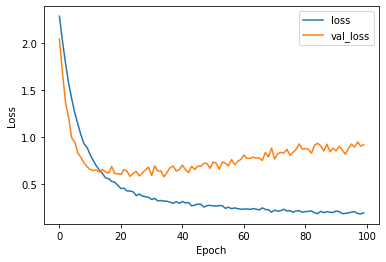

In [17]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

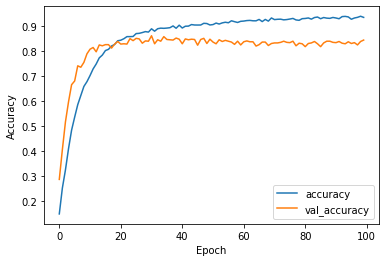

In [18]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [19]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 29ms/step - loss: 0.9427 - accuracy: 0.8272


[0.9427071213722229, 0.8272311091423035]

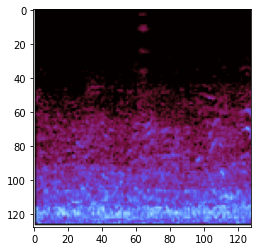

(128, 128, 3)


In [30]:
plt.imshow(( tf.squeeze(X_test[789]) ))
plt.show()
# Print the shape of the sample image
print(X_test[789].shape)

In [38]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1, 128, 128, 3))

# Print the prediction result
prediction_result

array([[9.29773510e-01, 1.20027596e-03, 1.88956549e-03, 6.05116948e-04,
        7.31908483e-04, 6.90226443e-03, 1.04282124e-04, 6.52194838e-04,
        5.72986668e-04, 5.75679503e-02]], dtype=float32)

In [39]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability=prediction_result.max()

In [40]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 0 with 0.9297735095024109 probability %
